# CLassification

## Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('./hearing_test.csv')
df.head(5)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


In [6]:
x = df.drop('test_result', axis = 1)
y = df['test_result']

In [10]:
from  sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 12345)

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
y_true = y_test
y_pred = model.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(f"accuracy = {accuracy_score(y_true, y_pred) * 100:.2f}")
print(f"precision = {precision_score(y_true, y_pred) * 100:.2f}")
print(f"recall = {recall_score(y_true, y_pred) * 100:.2f}")
print(f"F1 score = {f1_score(y_true, y_pred) * 100:.2f}")

[[525  72]
 [109 794]]
accuracy = 87.93
precision = 91.69
recall = 87.93
F1 score = 89.77


In [16]:

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       597
           1       0.92      0.88      0.90       903

    accuracy                           0.88      1500
   macro avg       0.87      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500



# result visualization

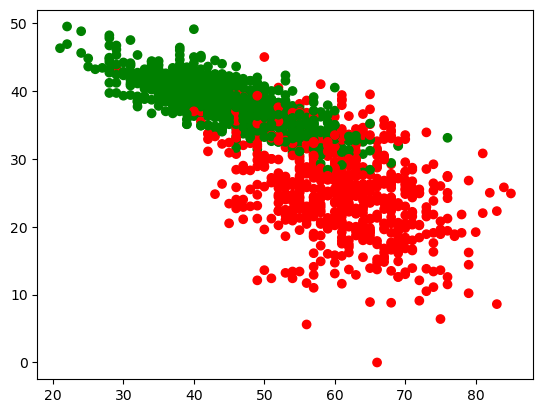

In [19]:

colors = []
for value in y_pred:
    colors.append("green" if value == 1 else "red")

plt.scatter(x_test['age'], x_test['physical_score'], color=colors)


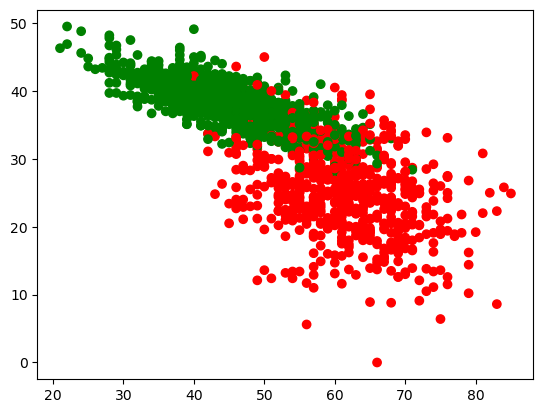

In [20]:
colors = []
for value in y_true:
    colors.append("green" if value == 1 else "red")

plt.scatter(x_test['age'], x_test['physical_score'], color=colors)
